<a href="https://colab.research.google.com/github/queezzy/deep-learning-adventure/blob/master/notebook/MNIST_dataset_classification_using_a_simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hello, Welcome to this Notebook.**
**This is a simple notebook to show how with a simple neural network with very few hidden states, we can build a digit classification system with a state of the art accuracy.**


---


### **Goal** : Classify an image representing a digit (0 to 9) into the right category (the corresponding digit). In other terms, from an image (maybe coming from an OCR task), can we determine the digit it contains.

### **Dataset** : MNIST Dataset composed of 60000 images for training and 10000 images for testing.

### **Applications** : Hence it is a state of art task, this can be used in many applications : Optical Character Recognition, 

### **We will build our model using Tensorflow, Keras,and numpy basically, so let us import the necessary libraries**

In [0]:
from __future__ import absolute_import, division, unicode_literals, print_function #Compatibility with python2/3 versions
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np


### **Let us fetch our MNIST Dataset and normalize it by dividing every pixel by 255. So our pixels are all between 0 and 1. Each image is a 28x28 pixel image. Next we are going to print a sample of image to have a look at it.texte en gras**

In [32]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train,X_test = X_train/255.0 , X_test/255.0
print(F"Training dataset : {X_train.shape}")
print(F"Test dataset : {X_test.shape}")

Training dataset : (60000, 28, 28)
Test dataset : (10000, 28, 28)


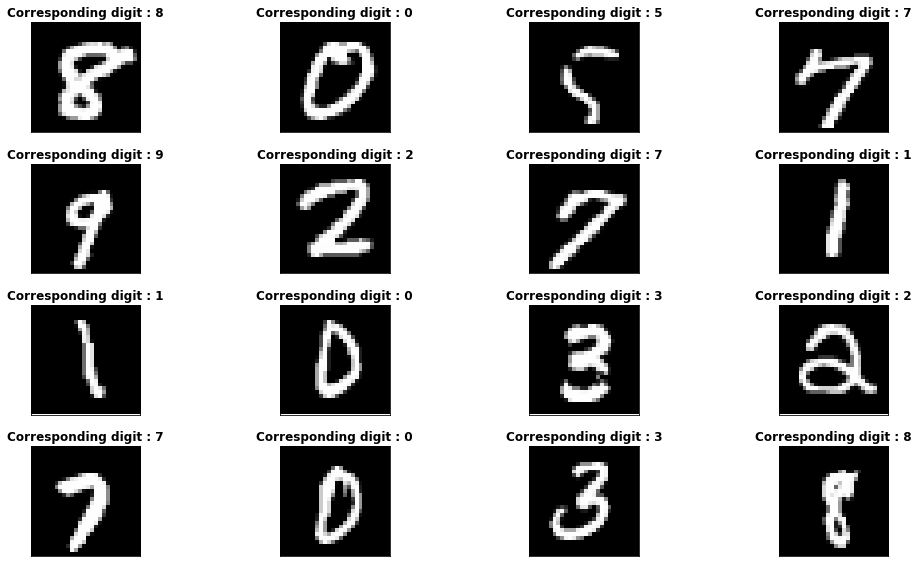

In [31]:
#Let us sample few examples 
num_images_to_show = 16
few_images = np.random.choice(X_train.shape[0], num_images_to_show)
fig, axes = plt.subplots(4,4,figsize = (14,8))
fig.tight_layout()
for i in range(few_images.size):
  row = i//4
  col = i%4
  ax = axes[row,col]
  ax.imshow(X_train[few_images[i]],cmap="Greys_r",)
  ax.set_title(F"Corresponding digit : {y_train[few_images[i]]}",fontweight="bold",fontsize="large")
  ax.tick_params(top=False,left=False,bottom=False,labelbottom=False,labeltop=False,labelleft=False)


### **Now we will first build a simple neural network model as follow** : 
 
 Model description : 2 Hidden layers
 - Input will be image of Shape 28x28
 - We will flatten each image into a dense 784 layer, this will be the real input of the network
 - We add another dense layer of 128, we use the relu activation 
 - We add a Dropout layer to regularize a little bit. Dropout probability is 0.2
 - Then we connect it to a Dense Layer of 10 neurons and then we apply Softmax activation

Training :
- We use a sparse categorical cross entropy loss. This function allow us to work with our target variable containing the index of the category and not a one hot encoded vector
- As a evaluation metrics we use accuracy
- Optimization function = Adam



In [0]:
model = Sequential(
    layers = [
              Flatten(input_shape = (28,28)),
              Dense(units=128,activation="relu",kernel_initializer=keras.initializers.he_normal(seed=None)),
              Dropout(rate= 0.2),
              Dense(units=10,activation="softmax")
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [37]:
model.fit(X_train,y_train,epochs=5)
model.evaluate(X_test,y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3022 - accuracy: 0.9120
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1457 - accuracy: 0.9565
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1101 - accuracy: 0.9669
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0904 - accuracy: 0.9718
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0773 - accuracy: 0.9758
10000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06959365585530176, 0.9783]

In [0]:
y_test_prediction = model.predict_classes(X_test)

errors = np.where(((y_test-y_test_prediction)!=0))[0]

217

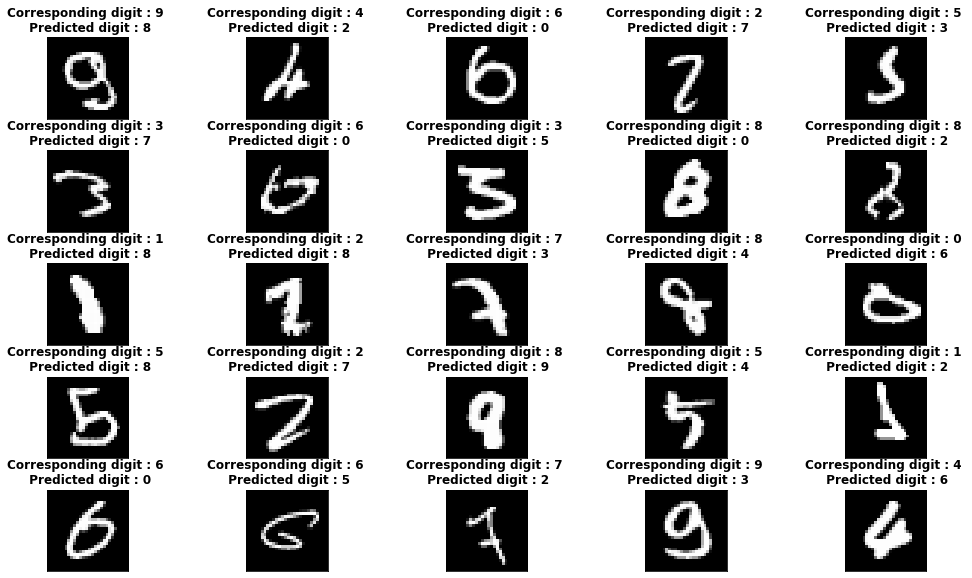

In [55]:
num_images_to_show = 25
few_images = np.random.choice(errors.size, num_images_to_show)
fig, axes = plt.subplots(5,5,figsize = (14,8))
fig.tight_layout()
for i in range(few_images.size):
  row = i//5
  col = i%5
  ax = axes[row,col]
  ax.imshow(X_test[errors[i]],cmap="Greys_r",)
  ax.set_title(F"Corresponding digit : {y_test[errors[i]]} \n Predicted digit : {y_test_prediction[errors[i]]}",fontweight="bold",fontsize="large")
  ax.tick_params(top=False,left=False,bottom=False,labelbottom=False,labeltop=False,labelleft=False)

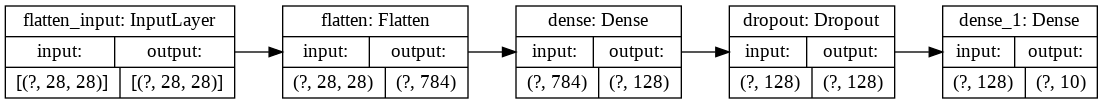

In [59]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,expand_nested=True,rankdir="LR")